 #                                          Data Mining Project. Group 2 Master in Finance and Fintech

# Topic: Finding pattern in Lending Club loan data and Building Classification model for final outcome of the loan.

In this project we will discover some insight pattern from loan data from Lending Club - a financial company based in US. Further explaination and guideline can be found in the report attached with this work book.

In this work we will build a model to classify whether the loan will be Paid or default base on available data that we have. After that we will find some association rules between the variable and some visualization to have an insight look of the data. First we will start with Importing and pre processing 

# 1. Data Preprocessing

In [133]:
project = pd.read_csv('loan.csv', low_memory=False)
thres = len(project) * .5
project = project.dropna(thresh= thres,axis=1) #drop columns with half null value

print(project.head(3))


   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   

  grade sub_grade       emp_title emp_length  ... percent_bc_gt_75  \
0     C        C1            Chef  10+ years  ...              0.0   
1     D        D2     Postmaster   10+ years  ...              0.0   
2     D        D1  Administrative    6 years  ...              0.0   

   pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                   1.0       0.0         60124.0           16901.0   
1                   1.0       0.0        372872.0           99468.0   
2                   0.0       0.0        136927.0           11749.0   

  total_bc_limit total_il_high_credit_limit hardship_flag disbursement_method  \
0        36500.0            

## Selecting useful columns for the analysis##

In [134]:
loan = project.filter(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
loan.head()


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,loan_status
0,2500,36 months,13.56,84.92,C,10+ years,RENT,55000.0,Not Verified,debt_consolidation,18.24,0.0,Current
1,30000,60 months,18.94,777.23,D,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,26.52,0.0,Current
2,5000,36 months,17.97,180.69,D,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,10.51,0.0,Current
3,4000,36 months,18.94,146.51,D,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,16.74,0.0,Current
4,30000,60 months,16.14,731.78,C,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,26.35,0.0,Current


## Import descrption of columns from excel##

In [7]:
data_dictionary = pd.read_excel('LCDataDictionary.xlsx')
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [8]:
loan_dtypes = pd.DataFrame(loan.dtypes,columns=['dtypes'])
loan_dtypes = loan_dtypes.reset_index()
loan_dtypes['name'] = loan_dtypes['index']
loan_dtypes = loan_dtypes[['name','dtypes']]
loan_dtypes['first value'] = loan.loc[0].values
preview = loan_dtypes.merge(data_dictionary, on='name',how='left')
preview

,name,dtypes,first value,description
0,loan_amnt,int64,2500,The listed amount of the loan applied for by t...
1,term,object,36 months,The number of payments on the loan. Values are...
2,int_rate,float64,13.56,Interest Rate on the loan
3,installment,float64,84.92,The monthly payment owed by the borrower if th...
4,grade,object,C,LC assigned loan grade
5,emp_length,object,10+ years,Employment length in years. Possible values ar...
6,home_ownership,object,RENT,The home ownership status provided by the borr...
7,annual_inc,float64,55000,The self-reported annual income provided by th...
8,verification_status,object,Not Verified,"Indicates if income was verified by LC, not ve..."
9,purpose,object,debt_consolidation,A category provided by the borrower for the lo...


In [75]:
preview['description'].unique()

array(['The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.',
       'The number of payments on the loan. Values are in months and can be either 36 or 60.',
       'Interest Rate on the loan',
       'The monthly payment owed by the borrower if the loan originates.',
       'LC assigned loan grade',
       'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ',
       'The home ownership status provided by the borrower during registration\xa0or obtained from the credit report.\xa0Our values are: RENT, OWN, MORTGAGE, OTHER',
       'The self-reported annual income provided by the borrower during registration.',
       'Indicates if income was verified by LC, not verified, or if the income source was verified',
       'A category provided by the borrower for the loan request. ',
       'A rat

## Data cleaning ##

In [4]:
print("ARE THERE MISSING VALUES?", loan.isnull().values.any())
print(loan.isna().sum()) 

ARE THERE MISSING VALUES? True
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
emp_length             146907
home_ownership              0
annual_inc                  4
verification_status         0
purpose                     0
dti                      1711
delinq_2yrs                29
loan_status                 0
dtype: int64


In [135]:
loan= loan.dropna()

print("ARE THERE MISSING VALUES?", loan.isnull().values.any())
print(loan.isna().sum()) 

ARE THERE MISSING VALUES? False
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
loan_status            0
dtype: int64


# Data Visualization

We will get a sample of 5000 rows since the data has 2 million rows, too much for our computer to handle

In [136]:
sample = loan.sample(n = 5000, replace=True, random_state=1)
sample.reset_index(drop=True)


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,loan_status
0,18000,60 months,26.31,542.24,E,10+ years,MORTGAGE,98500.0,Verified,debt_consolidation,24.93,0.0,Current
1,18000,36 months,17.99,650.66,D,5 years,RENT,100000.0,Source Verified,debt_consolidation,28.92,2.0,Fully Paid
2,7200,36 months,16.99,256.67,D,9 years,RENT,35000.0,Verified,debt_consolidation,22.26,0.0,Current
3,29250,60 months,30.84,961.49,G,1 year,MORTGAGE,88700.0,Verified,debt_consolidation,31.92,0.0,Charged Off
4,20000,36 months,6.11,609.44,A,10+ years,MORTGAGE,105000.0,Source Verified,credit_card,14.99,0.0,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10000,36 months,10.42,324.65,B,7 years,OWN,65000.0,Not Verified,debt_consolidation,14.42,3.0,Fully Paid
4996,6000,36 months,12.61,201.04,C,10+ years,MORTGAGE,79000.0,Verified,debt_consolidation,19.66,1.0,Charged Off
4997,29000,36 months,13.67,986.51,C,< 1 year,OWN,66000.0,Verified,debt_consolidation,25.76,0.0,Current
4998,6400,36 months,22.35,245.58,E,2 years,RENT,38500.0,Verified,debt_consolidation,42.36,0.0,Fully Paid


Visualizing categorical variables:

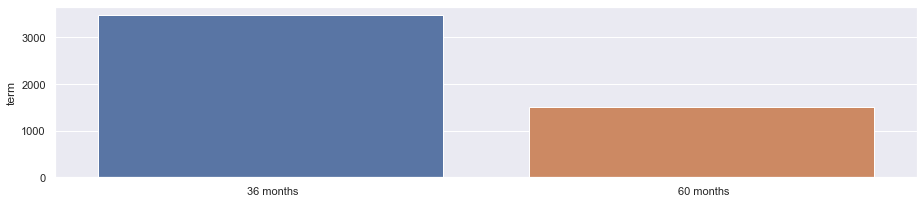

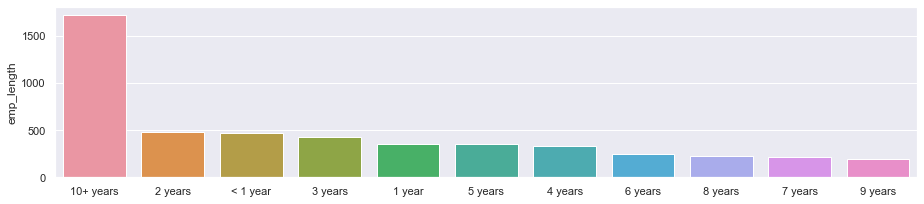

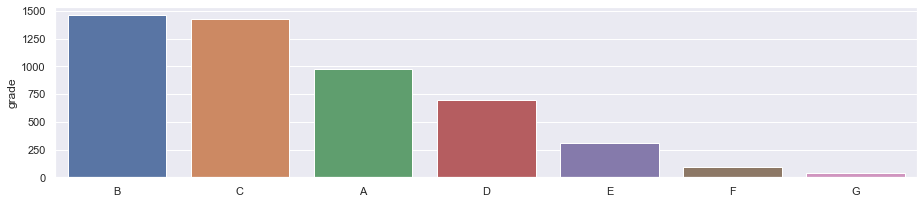

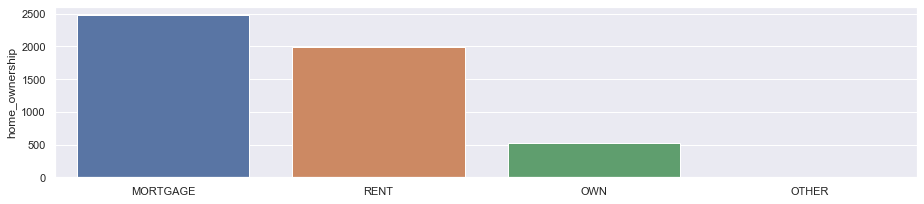

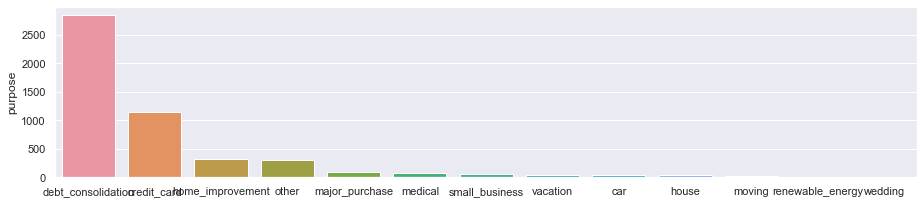

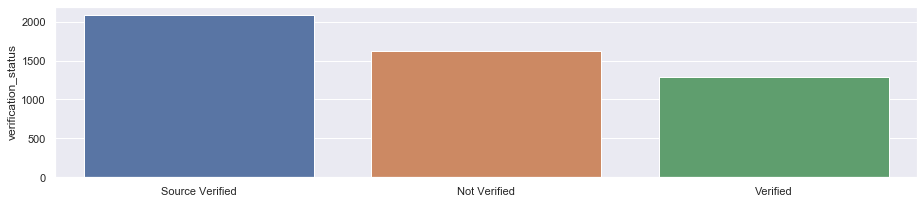

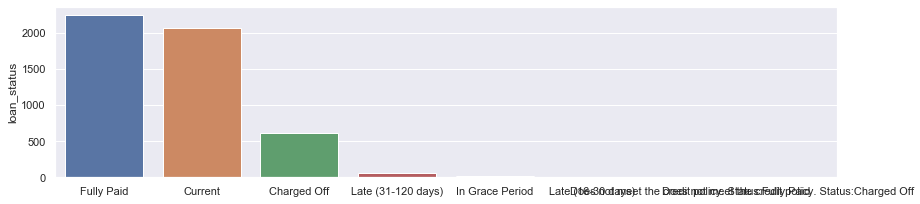

In [137]:
categorical = sample.filter(['term','emp_length', 'grade', 'home_ownership', 'purpose', 'verification_status', 'loan_status'])
categorical.reset_index(drop=True)

for column in categorical:
    f, ax = plt.subplots(figsize=(13,3))
    a = categorical[column].value_counts()
    sns.barplot(x = a.index, y = a)
    plt.tight_layout()
    plt.show()

Visualizing numerical variables:

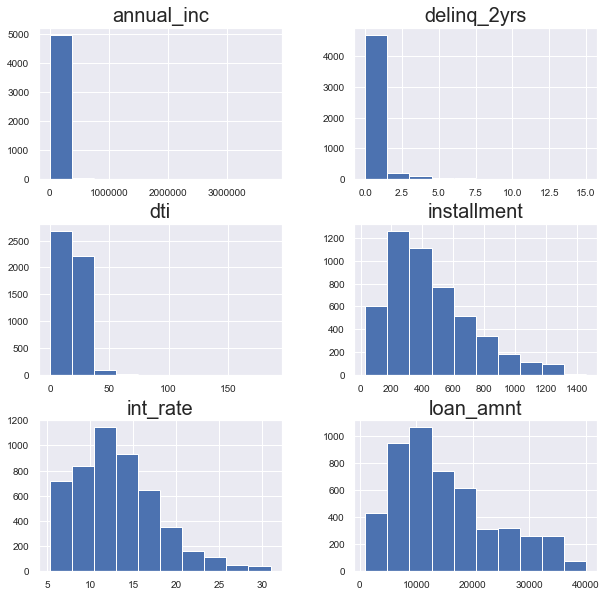

In [138]:
numerical = sample.filter(['annual_inc','delinq_2yrs', 'dti', 'installment', 'int_rate','loan_amnt'])
numerical.reset_index(drop=True)

plt.rc('axes',titlesize= 20)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
numerical.hist(figsize = (10,10));

We will look at the relationship between numerical variables with target column

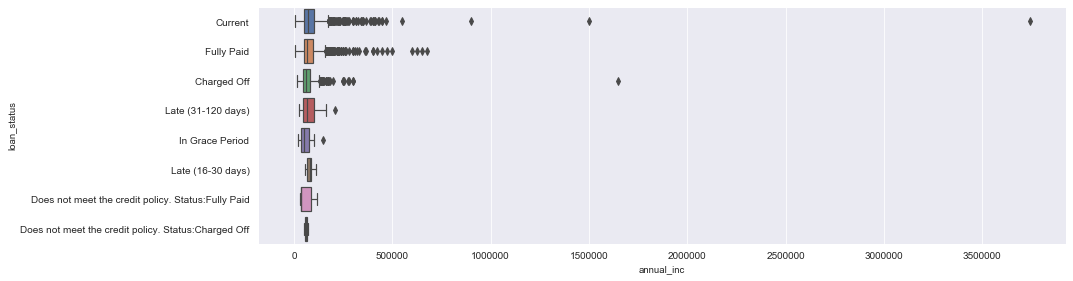

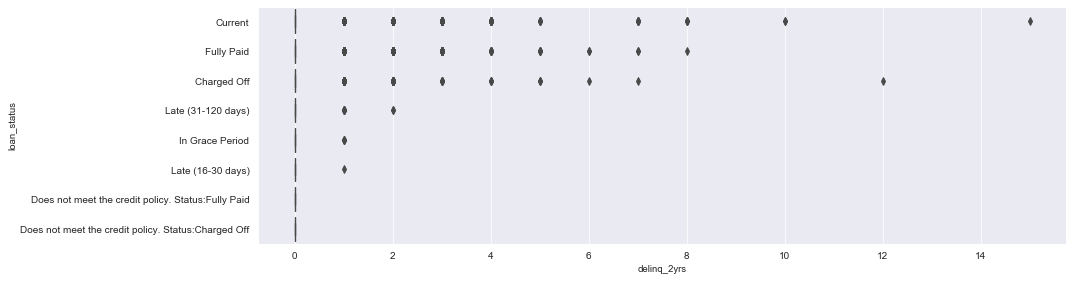

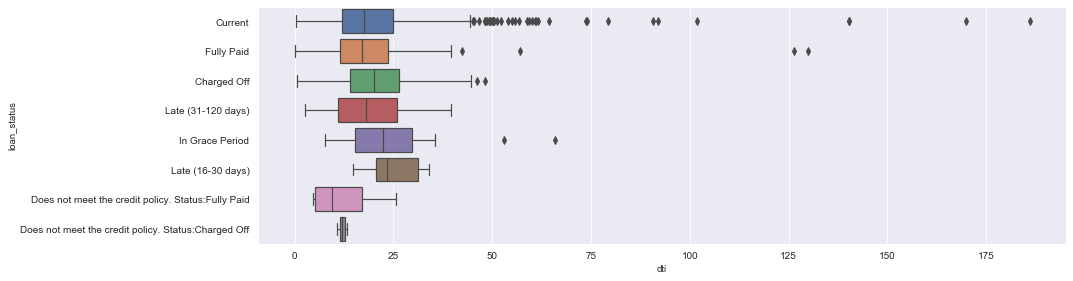

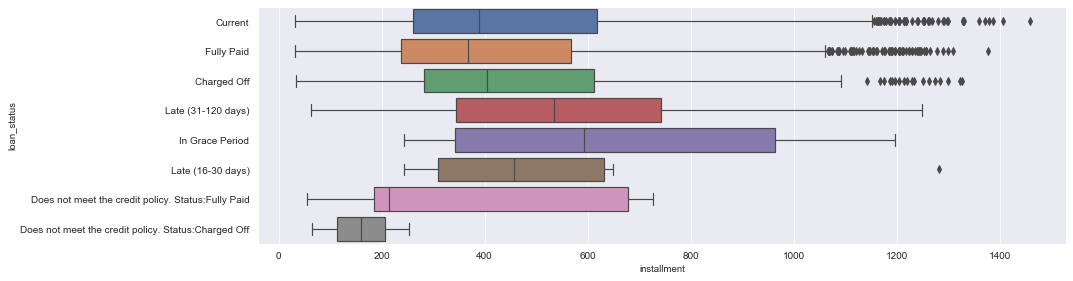

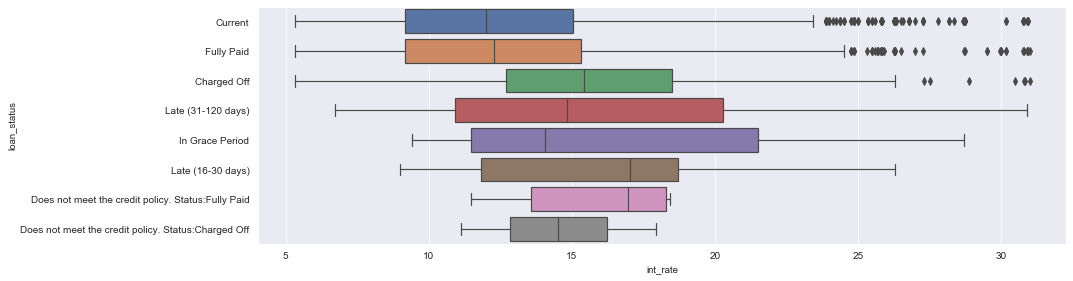

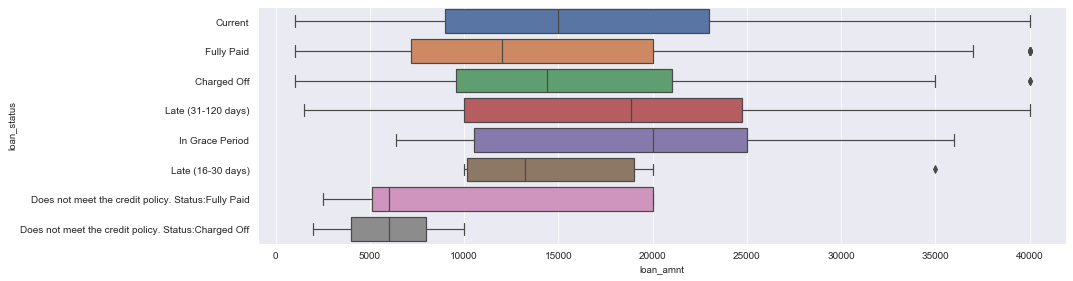

In [54]:
for column in numerical:
    f, ax = plt.subplots(figsize=(15,4))
    sns.boxplot(x=numerical[column], y=sample['loan_status'])
    plt.tight_layout()
    plt.show()

We will look at the correlation of variables 

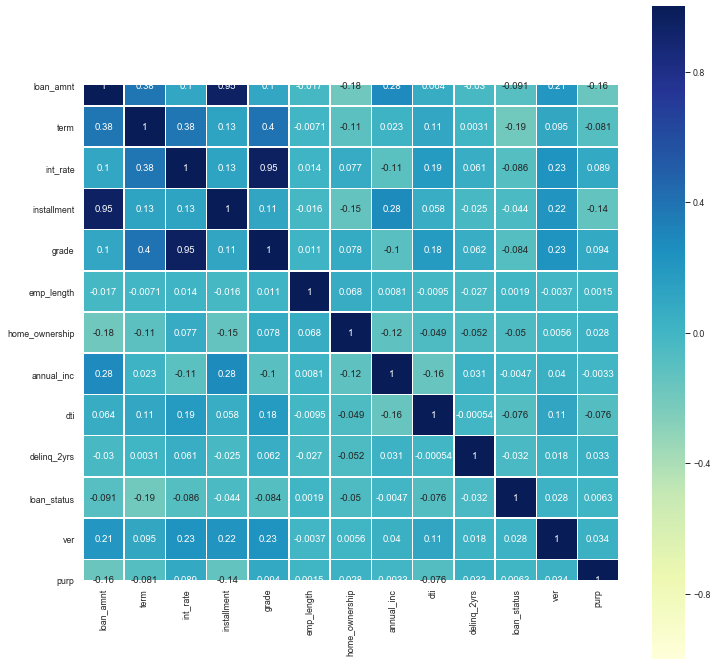

In [55]:
plt.figure(figsize=(12,12))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(sample.assign(grade=sample.grade.astype('category').cat.codes,
                         emp_length=sample.emp_length.astype('category').cat.codes,
                          loan_status=sample.loan_status.astype('category').cat.codes,
                         term=sample.term.astype('category').cat.codes,
                        home_ownership=sample.home_ownership.astype('category').cat.codes,
                         ver =sample.verification_status.astype('category').cat.codes,
                        purp=sample.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='YlGnBu',vmin=-1, vmax=1, square=True, linewidths=0.5);



# Data preprocessing

In [8]:
print(sample.info())#basic info of each variable
print(sample.describe()) #stats of each variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 140938 to 1274751
Data columns (total 13 columns):
loan_amnt              5000 non-null int64
term                   5000 non-null object
int_rate               5000 non-null float64
installment            5000 non-null float64
grade                  5000 non-null object
emp_length             5000 non-null object
home_ownership         5000 non-null object
annual_inc             5000 non-null float64
verification_status    5000 non-null object
purpose                5000 non-null object
dti                    5000 non-null float64
delinq_2yrs            5000 non-null float64
loan_status            5000 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 546.9+ KB
None
          loan_amnt     int_rate  installment    annual_inc          dti  \
count   5000.000000  5000.000000  5000.000000  5.000000e+03  5000.000000   
mean   15298.640000    13.122158   451.662386  8.015725e+04    18.747512   
std     9264

We will first remove some outliers witnessed in the above charts

In [139]:
col1 = 'annual_inc'
Q1 = numerical[col1].quantile(0.25)
Q3  = numerical[col1].quantile(0.75)

IQR = Q3-Q1
numerical = numerical[numerical[col1] < Q3 + 1.5*IQR]
numerical = numerical[numerical[col1] > Q1 - 1.5*IQR]


col3 = 'dti'
Q1 = numerical[col3].quantile(0.25)
Q3  = numerical[col3].quantile(0.75)

IQR = Q3-Q1
numerical = numerical[numerical[col3] < Q3 + 1.5*IQR]
numerical = numerical[numerical[col3] > Q1 - 1.5*IQR]


print(numerical.describe())

          annual_inc  delinq_2yrs          dti  installment     int_rate  \
count    4712.000000  4712.000000  4712.000000  4712.000000  4712.000000   
mean    71090.237672     0.298387    18.497213   435.316409    13.180236   
std     31110.721309     0.854579     8.439153   256.864549     4.831022   
min      6000.000000     0.000000     0.000000    30.910000     5.310000   
25%     48000.000000     0.000000    12.230000   248.980000     9.740000   
50%     65000.000000     0.000000    17.910000   372.580000    12.690000   
75%     90000.000000     0.000000    24.610000   575.862500    15.990000   
max    164000.000000    15.000000    43.520000  1406.090000    30.990000   

          loan_amnt  
count   4712.000000  
mean   14751.963073  
std     8866.989532  
min     1000.000000  
25%     8000.000000  
50%    12500.000000  
75%    20000.000000  
max    40000.000000  


In [140]:
data = numerical.combine_first(categorical) 
data.reset_index()
data = data.dropna()
data.shape

(4724, 13)

We start transform categorical data in to numeric value

In [141]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
data = data.replace(mapping_dict)
data[['emp_length','grade']].head()

,emp_length,grade
498,1,1
1547,0,1
2221,10,4
2323,1,1
2704,3,3


In [ ]:
#The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

In [142]:
categorical_features = ['verification_status', 'term','home_ownership', 'purpose']
dummy_df = pd.get_dummies(data[categorical_features])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(categorical_features, axis=1)
data

,annual_inc,delinq_2yrs,dti,emp_length,grade,installment,int_rate,loan_amnt,loan_status,verification_status_Not Verified,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
498,150000.0,0.0,15.24,1,1,1109.90,8.81,35000.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
1547,33750.0,0.0,10.95,0,1,260.37,6.46,8500.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
2221,72000.0,0.0,39.63,10,4,375.66,18.94,14500.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
2323,65000.0,0.0,14.94,1,1,672.13,8.19,33000.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
2704,134400.0,0.0,15.53,3,3,806.43,13.56,35000.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259800,60000.0,0.0,31.88,7,3,938.32,12.62,28000.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
2259901,89000.0,0.0,33.07,7,5,877.91,24.85,30000.0,Current,0,...,0,0,0,0,0,0,0,0,0,0
2260144,48000.0,0.0,13.00,4,3,201.91,12.62,6025.0,Current,1,...,0,0,0,0,0,0,0,0,0,0
2260416,80000.0,1.0,19.68,8,4,249.89,17.09,7000.0,Current,0,...,0,0,0,0,0,1,0,0,0,0


# Transform target column Loan_status

In [21]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status = loan['loan_status'].value_counts().index
count = loan['loan_status'].value_counts().values
target_description = pd.DataFrame({'Loan Status' :status, 'Count': count, 'Meaning': meaning})[['Loan Status','Count','Meaning']]
target_description

,Loan Status,Count,Meaning
0,Fully Paid,986880,Loan has been fully paid off.
1,Current,851120,Loan for which there is no longer a reasonable...
2,Charged Off,241259,"While the loan was paid off, the loan applicat..."
3,Late (31-120 days),19962,"While the loan was charged off, the loan appli..."
4,In Grace Period,8378,Loan is up to date on current payments.
5,Late (16-30 days),3306,The loan is past due but still in the grace pe...
6,Does not meet the credit policy. Status:Fully ...,1943,Loan hasn't been paid in 31 to 120 days (late ...
7,Does not meet the credit policy. Status:Charge...,743,Loan hasn't been paid in 16 to 30 days (late o...
8,Default,28,Loan is defaulted on and no payment has been m...


As we can see the loan status can be divided into 2 major category: Fully paid and Charge off. We will now split into binary class and try analize on multiple class later

In [143]:
data = data[(data["loan_status"] == "Fully Paid") |
(data["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
data = data.replace(mapping_dictionary)
data.reset_index()

,index,annual_inc,delinq_2yrs,dti,emp_length,grade,installment,int_rate,loan_amnt,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,38909,32000.0,0.0,13.47,4,2,194.54,10.33,6000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,67609,112000.0,0.0,25.76,5,3,70.46,16.14,2000.0,1,...,0,0,1,0,0,0,0,0,0,0
2,85348,33000.0,0.0,13.64,4,3,462.91,16.91,13000.0,1,...,0,0,0,0,0,0,0,0,0,0
3,94261,70150.0,1.0,28.28,4,4,54.21,17.97,1500.0,1,...,0,0,0,0,0,1,0,0,0,0
4,95992,115000.0,0.0,14.44,10,4,1113.69,19.92,30000.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2249525,52250.0,0.0,16.35,2,3,527.51,16.02,15000.0,1,...,0,0,0,0,0,0,0,0,0,0
2732,2252721,23000.0,0.0,9.08,4,2,88.28,10.91,2700.0,1,...,0,0,0,0,0,1,0,0,0,0
2733,2253172,65600.0,0.0,25.34,10,2,961.27,10.91,29400.0,0,...,0,0,0,0,0,0,0,0,0,0
2734,2256341,35000.0,0.0,22.12,1,3,169.90,13.59,5000.0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
data.to_csv('data.csv')
print(data.info()) #use describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 38909 to 2258381
Data columns (total 31 columns):
annual_inc                             2736 non-null float64
delinq_2yrs                            2736 non-null float64
dti                                    2736 non-null float64
emp_length                             2736 non-null int64
grade                                  2736 non-null int64
installment                            2736 non-null float64
int_rate                               2736 non-null float64
loan_amnt                              2736 non-null float64
loan_status                            2736 non-null int64
verification_status_Not Verified       2736 non-null uint8
verification_status_Source Verified    2736 non-null uint8
verification_status_Verified           2736 non-null uint8
term_ 36 months                        2736 non-null uint8
term_ 60 months                        2736 non-null uint8
home_ownership_MORTGAGE                2736 non-

# Visualization and scaling the data

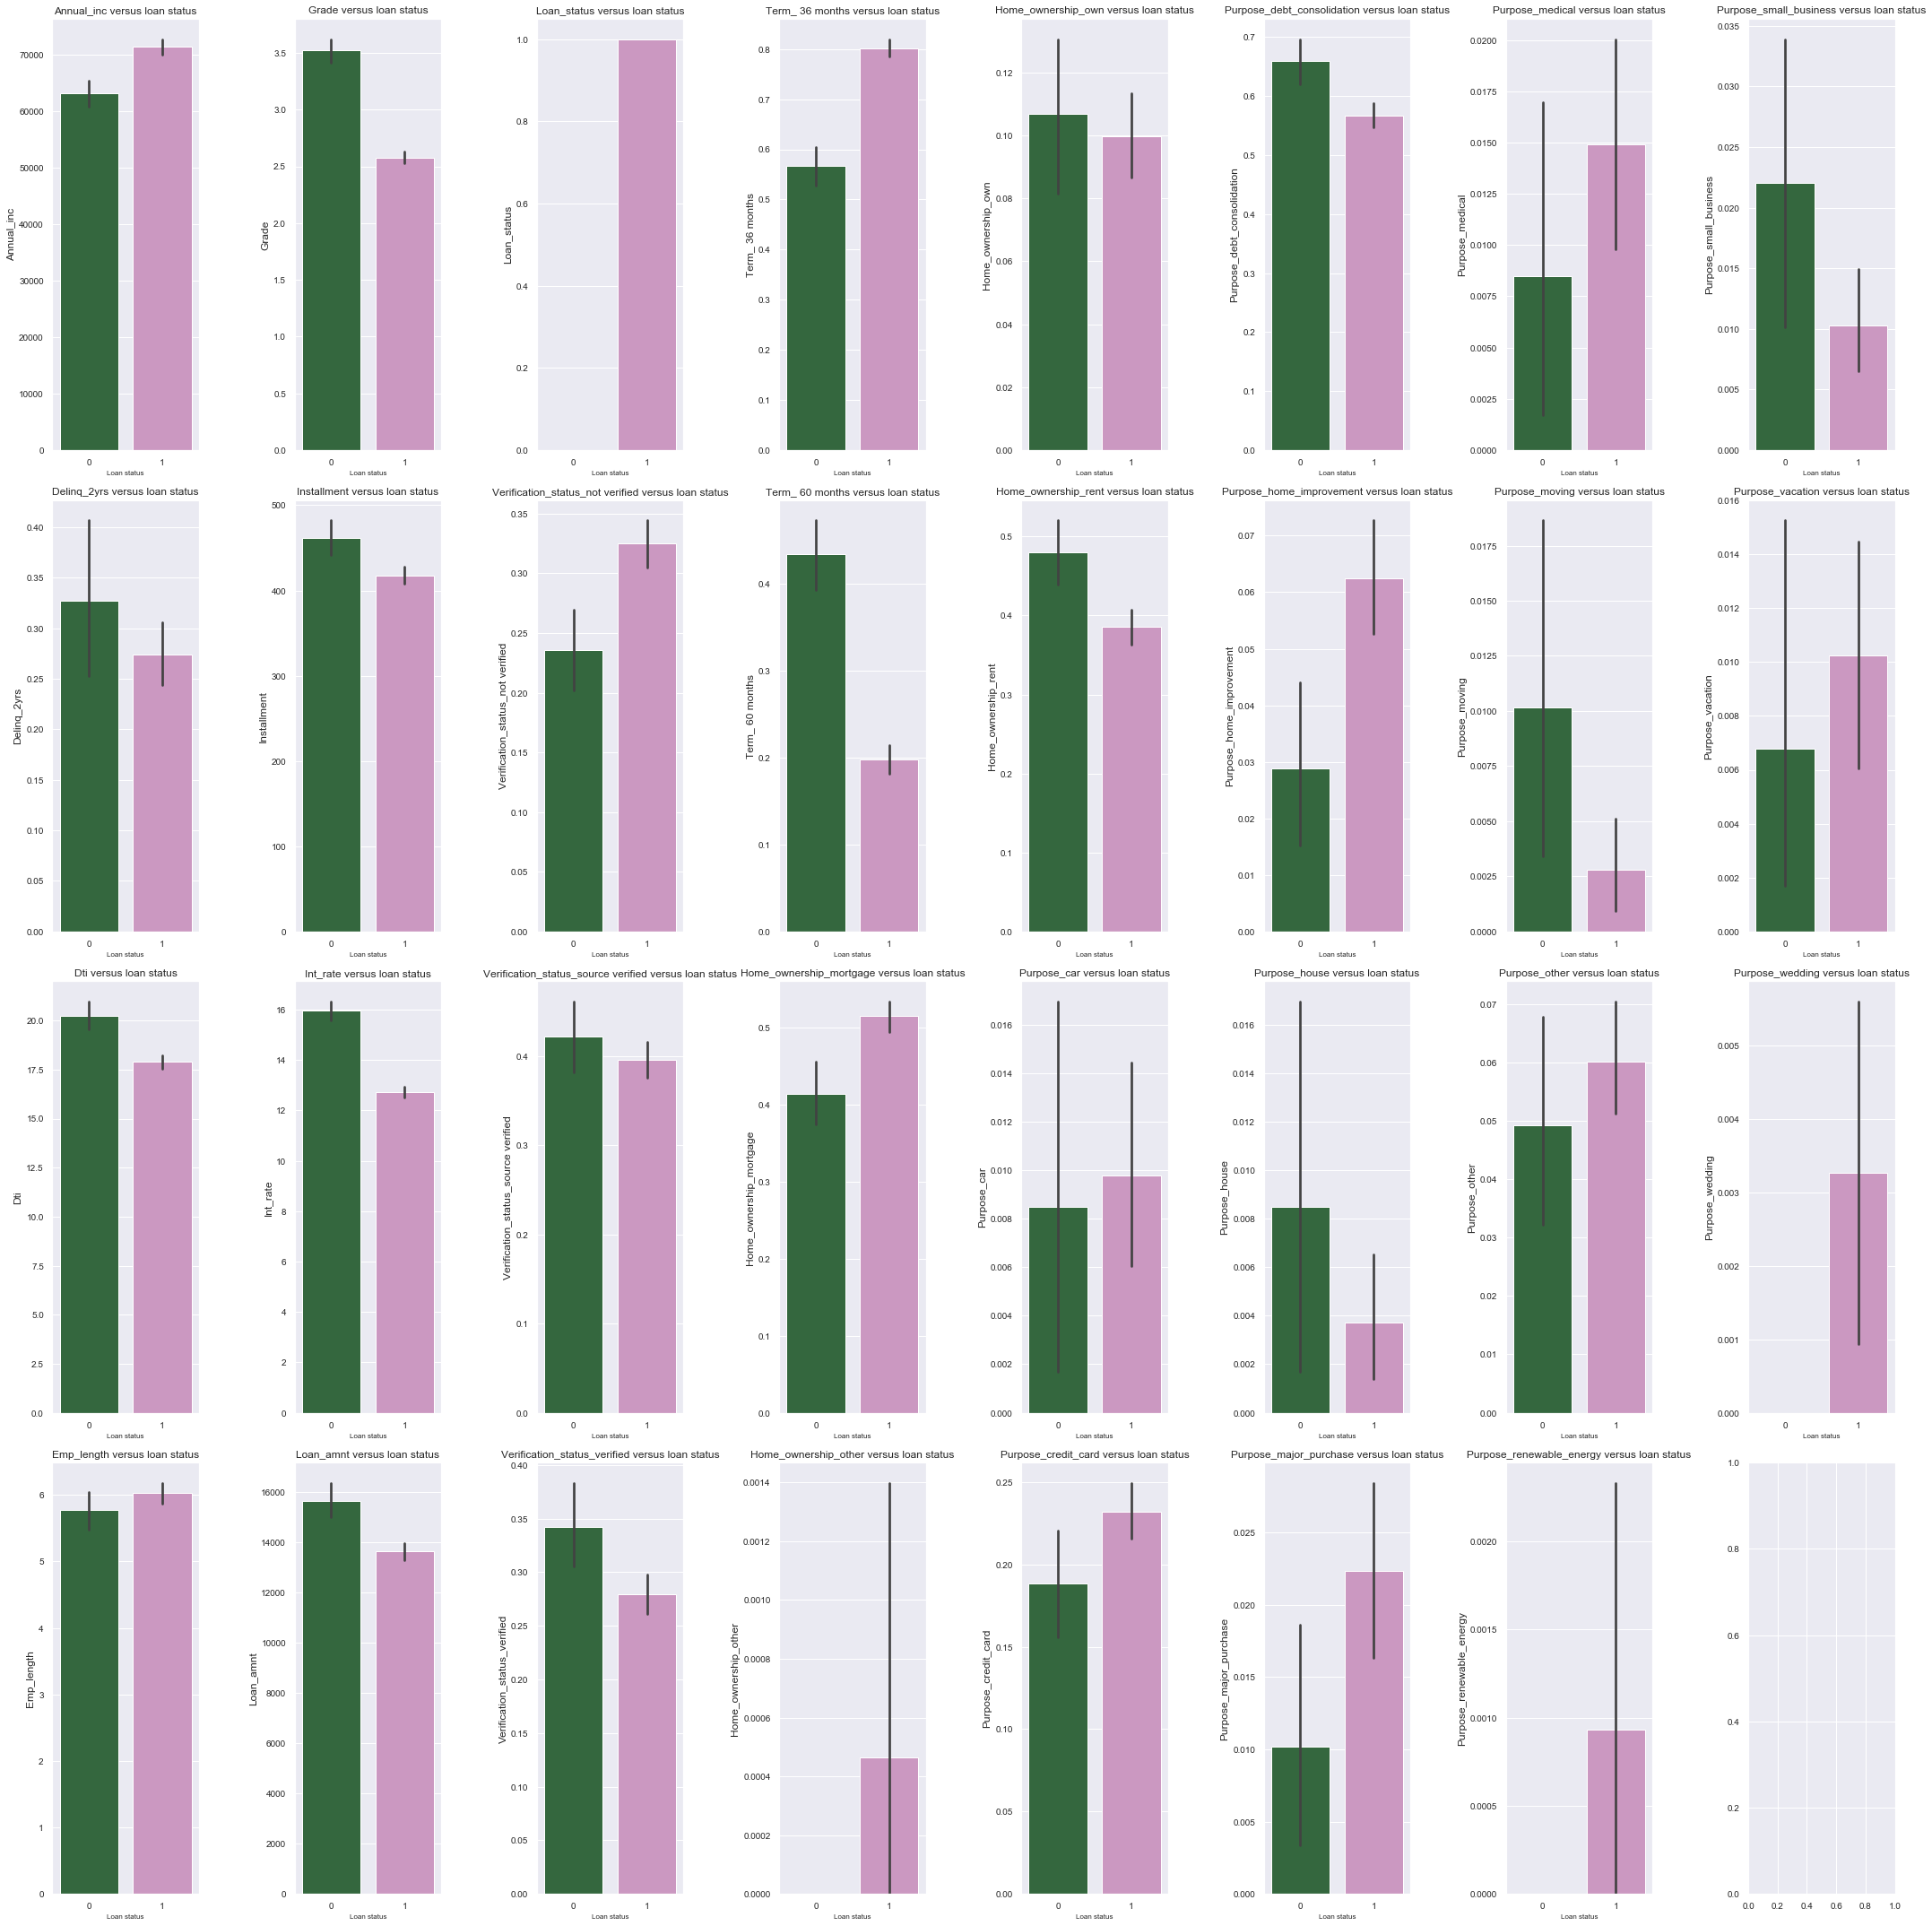

In [153]:
fig, ax = plt.subplots(figsize=(30,30), nrows=4, ncols=8)
font = {'fontsize': 12}
counter = 0

for column in data.columns:
  j = counter//4; i = counter%4;
  sns.barplot(x = 'loan_status', y = column, data = data,ax=ax[i,j],palette="cubehelix")
  ax[i,j].set_title('%s versus loan status'%column.capitalize(), fontdict = font)
  ax[i,j].set_ylabel(column.capitalize()) # Y label
  ax[i,j].set_xlabel('Loan status', fontdict = {'fontsize': 8}) # X label
  counter +=1
plt.tight_layout()
plt.show()

From the barplot we can see most of the attribute has normal distribution with the target column.
However, the scale of all the attributes is not in the same range, so we need to scale the data for better prediction accuracy

In [154]:
scaler = StandardScaler(with_mean=True, with_std=True)

numer_scale = ['annual_inc','delinq_2yrs', 'dti', 'installment', 'int_rate','loan_amnt']
data[numer_scale] = scaler.fit_transform(data[numer_scale])

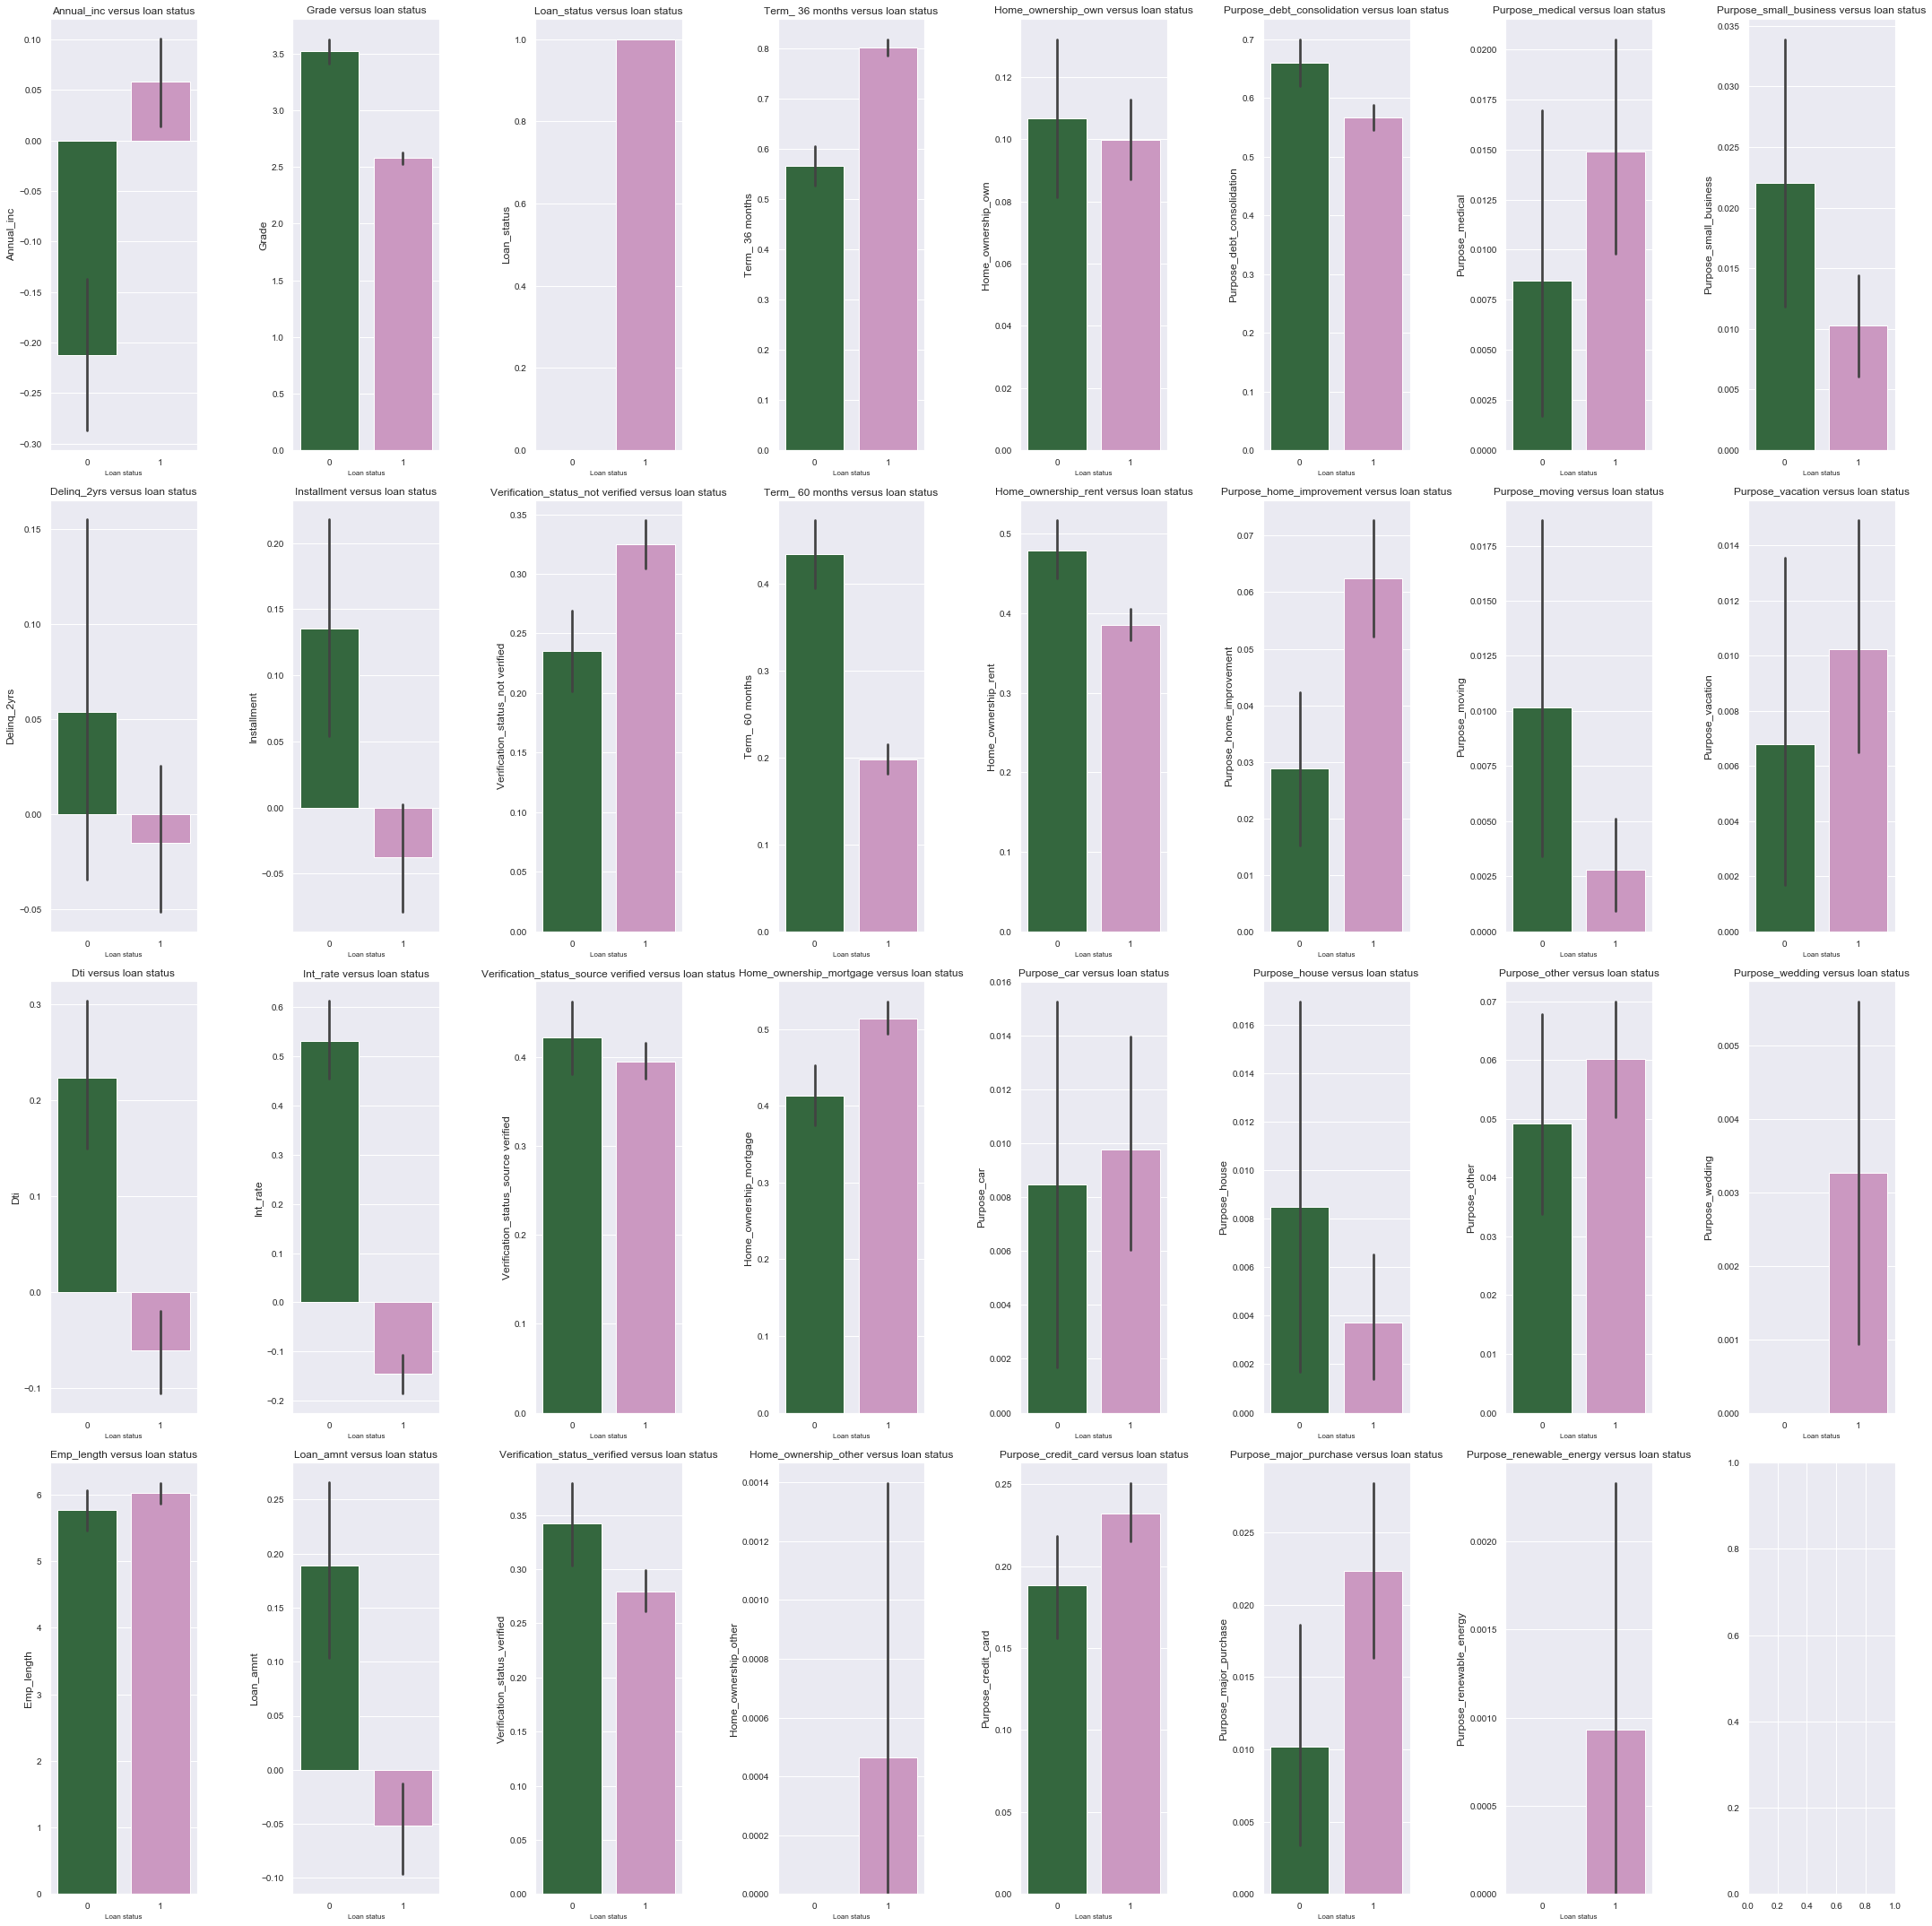

In [155]:
fig, ax = plt.subplots(figsize=(30,30), nrows=4, ncols=8)
font = {'fontsize': 12}
counter = 0

for column in data.columns:
  j = counter//4; i = counter%4;
  sns.barplot(x = 'loan_status', y = column, data = data,ax=ax[i,j],palette="cubehelix")
  ax[i,j].set_title('%s versus loan status'%column.capitalize(), fontdict = font)
  ax[i,j].set_ylabel(column.capitalize()) # Y label
  ax[i,j].set_xlabel('Loan status', fontdict = {'fontsize': 8}) # X label
  counter +=1
plt.tight_layout()
plt.show()

In [121]:
X = data.drop(['loan_status'], axis = 1).values
y = data['loan_status'].values

rn = random.randint(0, 100000)#22078, 37918, 89186, 60162, 35038, 1183, 69668, 2784
rn = 22078

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rn)

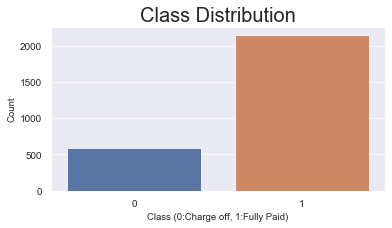

In [122]:
class_count = data['loan_status'].value_counts()
plt.figure(figsize = (6,3))
sns.barplot(x = class_count.index, y = class_count)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class (0:Charge off, 1:Fully Paid)')
plt.show()

We noitice here there's imbalance in the class label, so we will balance it

In [123]:
seed = 100
k = 1
over = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_train, y_train = over.fit_resample(X_train, y_train)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

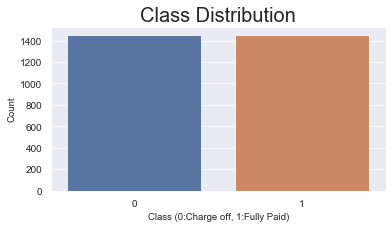

In [124]:
final_sample = pd.DataFrame(X_train_scaled)
final_sample['loan_status'] = y_train

class_count = final_sample['loan_status'].value_counts()
plt.figure(figsize = (6,3))
sns.barplot(x = class_count.index, y = class_count)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class (0:Charge off, 1:Fully Paid)')
plt.show()

# Using SVM for classifying paid or default loan

In [33]:
from sklearn.svm import SVC
class_weights = dict()

class_weights[0] = 10
class_weights[1] = 0.1

svm = SVC(kernel='linear', C=10)

svm.fit(X_train_scaled,y_train)

print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

print("\nDETAILED REPORT TEST SET:\n")
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["Charge Off","Fully paid"]))

GLOBAL ACCURACY TRAIN SET (LIB) 0.6727145847871598
GLOBAL ACCURACY TEST SET (LIB) 0.7027624309392265

DETAILED REPORT TEST SET:

              precision    recall  f1-score   support

  Charge Off       0.38      0.65      0.48       189
  Fully paid       0.89      0.72      0.79       716

    accuracy                           0.70       905
   macro avg       0.63      0.68      0.63       905
weighted avg       0.78      0.70      0.73       905



We will try to use non-linear SVM and tune the model to find the best parameter

In [35]:
#### TUNE THE KERNELIZED MACHINE
print("\nTUNNING THE NON-LINEAR SVM IN TWO PARAMETERS ...\n")
parameters_rbf = {'C': np.logspace(-3, 4, num=8, endpoint=True, base=10.0), 'gamma': [0.01, 0.1], 'kernel': ['rbf']}

svm = SVC()
grid_result_rbf = GridSearchCV(svm, parameters_rbf,return_train_score=True)
grid_result_rbf.fit(X_train_scaled,y_train)

means = grid_result_rbf.cv_results_['mean_test_score']
stds = grid_result_rbf.cv_results_['std_test_score']
params = grid_result_rbf.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

print("\nBEST RESULTS FOR NON-LINEAR SVM ...\n")
print("PARAMS: ",grid_result_rbf.best_params_)
print("SCORE: ",grid_result_rbf.best_score_)


print("\nTUNNING THE SVM INCLUDING DIFFERENT KERNELS ...\n")
parameters = [
  {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'kernel': ['linear']},
  {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'gamma': [0.01, 0.02, 0.1, 0.2], 'kernel': ['rbf']},
 ]

svm = SVC()
grid_result = GridSearchCV(svm, parameters,return_train_score=True)
grid_result.fit(X_train_scaled,y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("\nBEST RESULTS ...\n")
print("PARAMS: ",grid_result.best_params_)
print("SCORE: ",grid_result.best_score_)




TUNNING THE NON-LINEAR SVM IN TWO PARAMETERS ...



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.654222 (0.017414) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.635729 (0.019313) with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.654222 (0.017414) with: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.635729 (0.019313) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.672017 (0.016067) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.677599 (0.020613) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.685973 (0.017608) with: {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.790649 (0.015562) with: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.731682 (0.035221) with: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.832519 (0.029620) with: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.778437 (0.052690) with: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.838102 (0.030563) with: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.787509 (0.070946) with: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.837404 (0.034852) with: {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.794836 (0.069463) wit

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.665736 (0.010508) with: {'C': 0.1, 'kernel': 'linear'}
0.668876 (0.011733) with: {'C': 1.0, 'kernel': 'linear'}
0.667830 (0.008668) with: {'C': 10.0, 'kernel': 'linear'}
0.672017 (0.016067) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.665387 (0.018005) with: {'C': 0.1, 'gamma': 0.02, 'kernel': 'rbf'}
0.677599 (0.020613) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.675157 (0.031685) with: {'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}
0.685973 (0.017608) with: {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.710049 (0.024353) with: {'C': 1.0, 'gamma': 0.02, 'kernel': 'rbf'}
0.790649 (0.015562) with: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.817167 (0.016595) with: {'C': 1.0, 'gamma': 0.2, 'kernel': 'rbf'}
0.731682 (0.035221) with: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.766574 (0.032483) with: {'C': 10.0, 'gamma': 0.02, 'kernel': 'rbf'}
0.832519 (0.029620) with: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.849616 (0.019334) with: {'C': 10.0, 'gamma': 0.2, 'kernel': 'rbf'}

B

- Best accuracy for SVM model can be achived at C = 10, gamma = 0.2 and using non-linear SVM

# Trying several classifier using grid search 

In [127]:
model_lbls = [
             'dt',
            'lr',
             'nb', 
             'lp', 
             'svc',
            'rf',
            'ab'
            ]

tuned_param_dt = [{'criterion': ['gini', 'entropy'],
                   'max_depth': list(range(1,20)),
                   'min_samples_split': [2, 3]}]
tuned_param_lr = [{'C': np.logspace(-3,3,7), 
                   'penalty': ['l1','l2']}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}] #
tuned_param_lp = [{'early_stopping': [True]}] 
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma':np.logspace(-9, 4, 14, base=10),
                    'C': np.logspace(-5, 10, 16, base=2),
                    },
                    {'kernel': ['linear'],
                     'C':  np.logspace(-5, 10, 16, base=2),                     
                    },
                   ]
tuned_param_rf = [{'n_estimators': [50, 100, 200, 500], 
                  'max_depth': list(range(1,20)), 
                  'min_samples_leaf': [10, 20, 50]}]
tuned_param_ab = [{'learning_rate': [1.0, 0.1, 0.01, 0.001, 0.0001]}]


models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'lr': {'name': 'Logistic Regression   ',
           'estimator': LogisticRegression(),
           'param':tuned_param_lr
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'rf': {'name': 'Random Forrest',
          'estimator': RandomForestClassifier(),
          'param': tuned_param_rf },
    'ab': {'name': 'AdaBoost Classifier',
           'estimator': AdaBoostClassifier(),
           'param': tuned_param_ab
          }
}

scores = ['precision', 'recall']

In [128]:
def print_result(model):
    best = models[model].best_params_
    mean = models[model].cv_results_['mean_test_score']
    std = models[model].cv_results_['std_test_score']
    params = models[model].cv_results_['params']
    print('Best parameters set found on train set: ');
    print(best);
    print();
    print('Grid scores on train set:');
    for mean, std, params in zip(mean, std, params):
        print('{:.3f} (+/-) {:.03f}) for {}'.format(mean, std, params));
    

In [129]:
for score in scores:
    print();
    print('Detailed classification report for the best parameter set: ');
    print();
    print('The model is trained on the full train set.');
    print('The scores are computed on the full test set.');
    data = {}
    
    for model in model_lbls:
        print('Trying model {}'.format(models[model]['name']))
        clf = GridSearchCV(models[model]['estimator'],
                          models[model]['param'],
                           cv =5,
                           scoring = '%s_macro' %score);
        clf.fit(X_train_scaled, y_train)
        print(classification_report(y_test, clf.predict(X_test), target_names=["Charge Off","Fully paid"]));
        data.update({models[model]['name']: '- score: {:,.1%}'.format(clf.best_score_)})
    
    print();
    print('--------------------------------');
    print('summary report of {}'.format(score));
    print();
    print('FINAL RESULT');
    for result in data:
        print(result, data[result]);
        print();
        


Detailed classification report for the best parameter set: 

The model is trained on the full train set.
The scores are computed on the full test set.
Trying model Decision Tree       
              precision    recall  f1-score   support

  Charge Off       0.24      0.88      0.38       208
  Fully paid       0.83      0.17      0.28       695

    accuracy                           0.33       903
   macro avg       0.54      0.53      0.33       903
weighted avg       0.69      0.33      0.30       903

Trying model Logistic Regression   


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver wil

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

              precision    recall  f1-score   support

  Charge Off       0.24      1.00      0.38       208
  Fully paid       0.96      0.03      0.06       695

    accuracy                           0.25       903
   macro avg       0.60      0.51      0.22       903
weighted avg       0.79      0.25      0.13       903

Trying model Gaussian Naive Bayes


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.37       208
  Fully paid       0.00      0.00      0.00       695

    accuracy                           0.23       903
   macro avg       0.12      0.50      0.19       903
weighted avg       0.05      0.23      0.09       903

Trying model Linear Perceptron   
              precision    recall  f1-score   support

  Charge Off       0.29      0.79      0.42       208
  Fully paid       0.87      0.41      0.55       695

    accuracy                           0.50       903
   macro avg       0.58      0.60      0.49       903
weighted avg       0.73      0.50      0.52       903

Trying model Support Vector      


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/m

              precision    recall  f1-score   support

  Charge Off       0.00      0.00      0.00       208
  Fully paid       0.77      1.00      0.87       695

    accuracy                           0.77       903
   macro avg       0.38      0.50      0.43       903
weighted avg       0.59      0.77      0.67       903

Trying model Random Forrest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.37       208
  Fully paid       0.00      0.00      0.00       695

    accuracy                           0.23       903
   macro avg       0.12      0.50      0.19       903
weighted avg       0.05      0.23      0.09       903

Trying model AdaBoost Classifier


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.37       208
  Fully paid       0.00      0.00      0.00       695

    accuracy                           0.23       903
   macro avg       0.12      0.50      0.19       903
weighted avg       0.05      0.23      0.09       903


--------------------------------
summary report of precision

FINAL RESULT
Decision Tree        - score: 81.7%

Logistic Regression    - score: 67.9%

Gaussian Naive Bayes - score: 70.8%

Linear Perceptron    - score: 57.6%

Support Vector       - score: 90.9%

Random Forrest - score: 82.6%

AdaBoost Classifier - score: 77.7%


Detailed classification report for the best parameter set: 

The model is trained on the full train set.
The scores are computed on the full test set.
Trying model Decision Tree       
              precision    recall  f1-score   support

  Charge Off       0.24      0.88      0.38       208
  Fully paid       0.83      0.18      0.29     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.38       208
  Fully paid       0.92      0.02      0.03       695

    accuracy                           0.24       903
   macro avg       0.57      0.51      0.20       903
weighted avg       0.76      0.24      0.11       903

Trying model Gaussian Naive Bayes
              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.38       208
  Fully paid       0.94      0.02      0.05       695

    accuracy                           0.25       903
   macro avg       0.59      0.51      0.21       903
weighted avg       0.78      0.25      0.12       903

Trying model Linear Perceptron   
              precision    recall  f1-score   support

  Charge Off       0.29      0.79      0.42       208
  Fully paid       0.87      0.41      0.55       695

    accuracy                           0.50       903
   macro avg       0.58      0.60      0.49       903
weight

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  Charge Off       0.00      0.00      0.00       208
  Fully paid       0.77      1.00      0.87       695

    accuracy                           0.77       903
   macro avg       0.38      0.50      0.43       903
weighted avg       0.59      0.77      0.67       903

Trying model Random Forrest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.37       208
  Fully paid       0.00      0.00      0.00       695

    accuracy                           0.23       903
   macro avg       0.12      0.50      0.19       903
weighted avg       0.05      0.23      0.09       903

Trying model AdaBoost Classifier
              precision    recall  f1-score   support

  Charge Off       0.23      1.00      0.37       208
  Fully paid       0.00      0.00      0.00       695

    accuracy                           0.23       903
   macro avg       0.12      0.50      0.19       903
weighted avg       0.05      0.23      0.09       903


--------------------------------
summary report of recall

FINAL RESULT
Decision Tree        - score: 80.5%

Logistic Regression    - score: 67.9%

Gaussian Naive Bayes - score: 59.7%

Linear Perceptron    - score: 57.1%

Support Vector       - score: 90.4%

Random Forrest - score: 81.6%

AdaBoost Classifier - 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- From the result we can see the data set works better with binary classification model such as Decision Tree and Random Forest, Non-linear SVM and Boosting method also have high accuracy.
- Bayes model has less accuracy cause it works better with categorical data, and most numerical variables in the data set have low correlation to the target


# Visualize some Classification

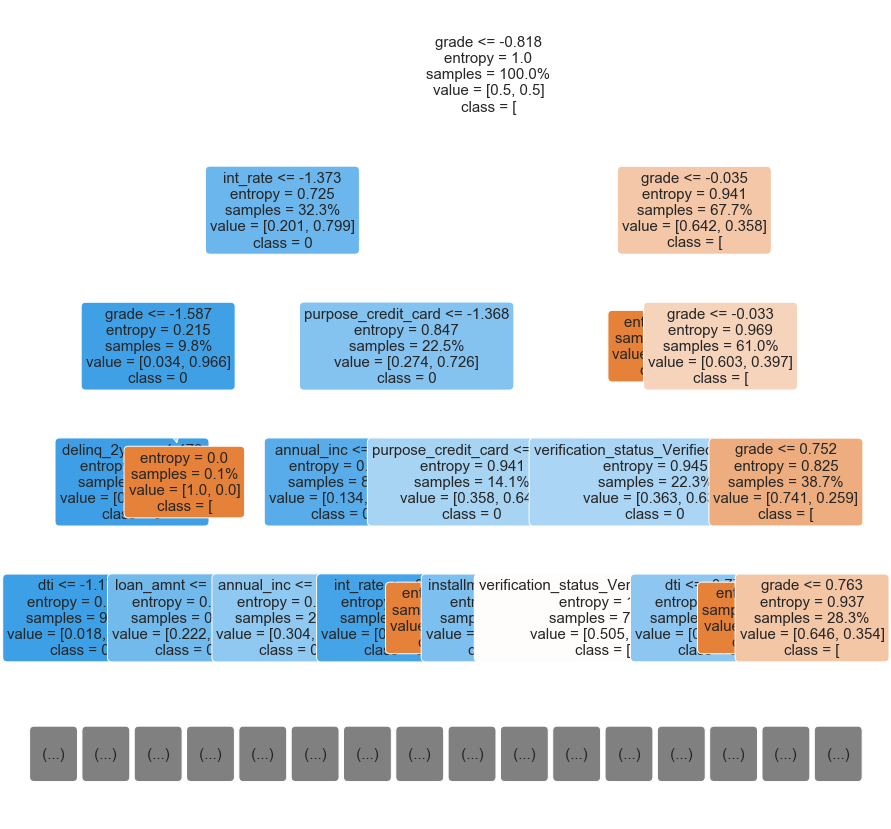

In [31]:
from sklearn import tree
model_DT = tree.DecisionTreeClassifier(criterion="entropy")
model_DT.fit(X_train_scaled, y_train)

plt.figure(figsize = (15,15))
tree.plot_tree(model_DT
          , filled=True
          , feature_names = sample.columns
          , class_names = str(model_DT.classes_)
          , rounded = True
          , fontsize = 15
          , proportion = True
          , max_depth = 4
              );

# Which variable has more weight in the SVM model?

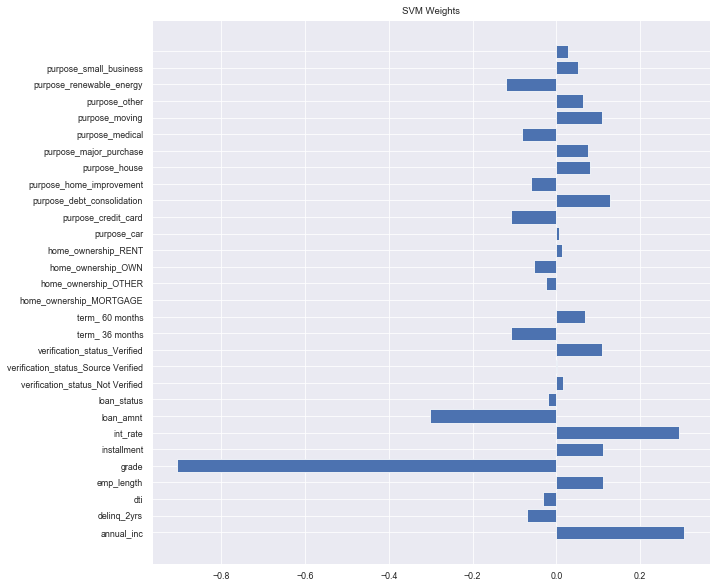

In [34]:
sample_df_train = pd.DataFrame(X_train,columns=data.columns[:-1])

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled,y_train)

w = svm.coef_[0]
b = svm.intercept_[0]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
var_idx = range(0,len(w))
ax.barh(var_idx, w, align='center')
ax.set_yticks(var_idx)
ax.set_yticklabels(sample_df_train.columns[:-1])
plt.title("SVM Weights")
plt.show()

- From the chart, we can notice the variable that highly correlated with the target column (calculated above) is given more weight when SVM do the classification
- Its interesting to see that different purpose has different weight/correlation to the outcome of the loan 
- Loan amount, interest rate and annual income hold major weight in the model

# Finding Association rules

Fiding Association rules require data to be binary. We'vs already encoded our Categorical into 0 and 1, now we will transform numerical values

In [156]:
numerical_features = ['annual_inc', 'delinq_2yrs', 'dti', 'installment', 'int_rate', 'loan_amnt']
numerical_forAR = data[numerical_features].copy()
numerical_forAR.reset_index()

for column in numerical_forAR:
    col_name = column + '_cat'
    threshold = numerical_forAR[column].quantile(0.5)
    numerical_forAR[col_name] = 1
    numerical_forAR.loc[numerical_forAR[column] <= threshold, col_name] = 0

new_numerical = numerical_forAR.drop(['annual_inc', 'delinq_2yrs', 'dti', 'installment', 'int_rate', 'loan_amnt'], axis = 1)
new_numerical

,annual_inc_cat,delinq_2yrs_cat,dti_cat,installment_cat,int_rate_cat,loan_amnt_cat
38909,0,0,0,0,0,0
67609,1,0,1,0,1,0
85348,0,0,0,1,1,1
94261,1,1,1,0,1,0
95992,1,0,0,1,1,1
...,...,...,...,...,...,...
2249525,0,0,0,1,1,1
2252721,0,0,0,0,0,0
2253172,1,0,1,1,0,1
2256341,0,0,1,0,1,0


In [157]:
dummy_df.reset_index()
new_sample = new_numerical.combine_first(dummy_df) 
new_sample

,annual_inc_cat,delinq_2yrs_cat,dti_cat,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,installment_cat,int_rate_cat,loan_amnt_cat,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
498,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1547,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2221,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2323,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2704,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259800,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2259901,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2260144,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2260416,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


We will transform employee length and grade

In [158]:
a = data[['emp_length','grade']].copy()
a.reset_index()

for column in a:
    col_name = column + '_cat'
    threshold = a[column].quantile(0.5)
    a[col_name] = 1
    a.loc[a[column] <= threshold, col_name] = 0

a_new = a.drop(['emp_length','grade'], axis = 1)
a_new

,emp_length_cat,grade_cat
38909,0,0
67609,0,0
85348,0,0
94261,0,1
95992,1,1
...,...,...
2249525,0,0
2252721,0,0
2253172,1,0
2256341,0,0


In [159]:
final_sample = new_sample.combine_first(a_new)
final_sample = final_sample.dropna()
final_sample

,annual_inc_cat,delinq_2yrs_cat,dti_cat,emp_length_cat,grade_cat,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,installment_cat,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
38909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
67609,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
85348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
94261,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95992,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2252721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2253172,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2256341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [167]:
target =pd.DataFrame(data['loan_status'])

final_sample = final_sample.combine_first(target)
final_sample = final_sample.dropna()
final_sample

,annual_inc_cat,delinq_2yrs_cat,dti_cat,emp_length_cat,grade_cat,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,installment_cat,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
38909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
67609,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
85348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
94261,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95992,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2252721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2253172,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2256341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [170]:
frequent_itemset = apriori(final_sample,  min_support= 0.25, use_colnames = True)
rules = association_rules(frequent_itemset, metric="lift", min_threshold= 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(emp_length_cat),(annual_inc_cat),0.420673,0.544872,0.252938,0.601270,1.103507,0.023725,1.141444
1,(annual_inc_cat),(emp_length_cat),0.544872,0.420673,0.252938,0.464216,1.103507,0.023725,1.081269
2,(home_ownership_MORTGAGE),(annual_inc_cat),0.494658,0.544872,0.346688,0.700864,1.286291,0.077163,1.521476
3,(annual_inc_cat),(home_ownership_MORTGAGE),0.544872,0.494658,0.346688,0.636275,1.286291,0.077163,1.389350
4,(annual_inc_cat),(installment_cat),0.544872,0.500000,0.359776,0.660294,1.320588,0.087340,1.471861
...,...,...,...,...,...,...,...,...,...
273,"(loan_amnt_cat, loan_status)","(term_ 36 months, installment_cat)",0.396368,0.374199,0.304220,0.767520,2.051103,0.155900,2.691852
274,"(loan_status, installment_cat)","(term_ 36 months, loan_amnt_cat)",0.412393,0.336271,0.304220,0.737694,2.193747,0.165544,2.530363
275,(loan_amnt_cat),"(term_ 36 months, loan_status, installment_cat)",0.486111,0.334936,0.304220,0.625824,1.868489,0.141404,1.777411
276,(loan_status),"(term_ 36 months, loan_amnt_cat, installment_cat)",0.842415,0.336271,0.304220,0.361129,1.073921,0.020940,1.038908


In [163]:
AR_sort = rules.sort_values(by=['confidence','support'], ascending=False)
AR_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,"(term_ 36 months, loan_amnt_cat)",(installment_cat),0.294019,0.500000,0.294019,1.000000,2.000000,0.147009,inf
40,"(loan_amnt_cat, annual_inc_cat)",(installment_cat),0.318548,0.500000,0.305444,0.958861,1.917722,0.146169,12.153846
46,"(home_ownership_MORTGAGE, loan_amnt_cat)",(installment_cat),0.294019,0.500000,0.278898,0.948571,1.897143,0.131888,9.722222
52,"(loan_amnt_cat, purpose_debt_consolidation)",(installment_cat),0.303763,0.500000,0.286962,0.944690,1.889381,0.135081,9.040000
42,"(annual_inc_cat, installment_cat)",(loan_amnt_cat),0.323589,0.482527,0.305444,0.943925,1.956213,0.149303,9.228271
...,...,...,...,...,...,...,...,...,...
34,(purpose_debt_consolidation),(int_rate_cat),0.559812,0.450941,0.284610,0.508403,1.127428,0.032168,1.116890
9,(dti_cat),(home_ownership_MORTGAGE),0.500000,0.493280,0.251680,0.503360,1.020436,0.005040,1.020298
21,(purpose_debt_consolidation),(emp_length_cat),0.559812,0.464718,0.268481,0.479592,1.032007,0.008327,1.028582
28,(term_ 36 months),(home_ownership_RENT),0.771169,0.393145,0.312500,0.405229,1.030736,0.009318,1.020316


In [171]:
target_filter = rules[(rules['consequents'].str.contains('loan_status',regex= False, na = False))] 
target_filter_lift = target_filter[(target_filter['lift'] > 1)]

target_filter_lift.sort_values(by=['lift'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(term_ 36 months, loan_amnt_cat)","(loan_status, installment_cat)",0.336271,0.412393,0.304220,0.904686,2.193747,0.165544,6.164975
1,"(annual_inc_cat, installment_cat)","(loan_amnt_cat, loan_status)",0.359776,0.396368,0.301282,0.837416,2.112727,0.158679,3.712753
2,"(home_ownership_MORTGAGE, installment_cat)","(loan_amnt_cat, loan_status)",0.341079,0.396368,0.285524,0.837118,2.111975,0.150331,3.705955
3,"(home_ownership_MORTGAGE, loan_amnt_cat)","(loan_status, installment_cat)",0.336271,0.412393,0.285524,0.849087,2.058925,0.146847,3.893668
4,"(loan_amnt_cat, annual_inc_cat)","(loan_status, installment_cat)",0.355769,0.412393,0.301282,0.846847,2.053494,0.154565,3.836727
...,...,...,...,...,...,...,...,...,...
79,(term_ 36 months),"(annual_inc_cat, loan_status, installment_cat)",0.818109,0.313301,0.261485,0.319621,1.020172,0.005170,1.009289
80,(term_ 36 months),"(emp_length_cat, loan_status)",0.818109,0.348024,0.289530,0.353901,1.016889,0.004809,1.009098
81,"(term_ 36 months, home_ownership_RENT)",(loan_status),0.299679,0.842415,0.256410,0.855615,1.015670,0.003956,1.091425
82,(term_ 36 months),"(home_ownership_MORTGAGE, loan_status)",0.818109,0.429487,0.356303,0.435521,1.014048,0.004936,1.010689


In [172]:
def draw_graph(rules, rules_to_show=5):
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    N = 50
    np.random.seed(42)
    colors = np.random.rand(N)
    G1 = nx.DiGraph()
    color_map = []
    strs = []  # will store the names of the rules   

    for i in range(rules_to_show):
        G1.add_nodes_from(["R" + str(i)])
        strs.append("R" + str(i))  # stores in a list the "names" of the rules
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)
    for node in G1:  # set the appropriate color for rule nodes and item nodes
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, width=weights,
            font_size=16, with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

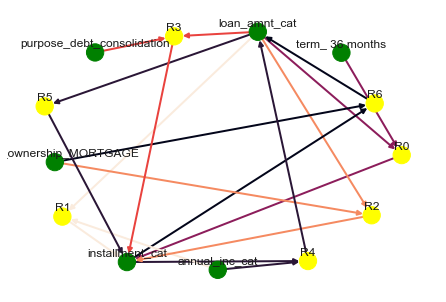

In [175]:
draw_graph(AR_sort, 7)

In [ ]:
## Importing the Libraries

import numpy as np
import pandas as pd
from sklearn.svm import SVC
#from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
#from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OutputCodeClassifier, OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import random

random_state = 42